<a href="https://colab.research.google.com/github/deepthisen/cunkonanon/blob/master/Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 3.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=bf9e285f30e5180d88d9ab69b85b104c62d15201f7a97bda8dde9d2fad8dbe1c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

In [312]:
# Get the data of stocks
data = yf.download(tickers = "CVX XOM BP OXY AMZN",start= '2016-08-01',end = '2020-08-01')
data_index = yf.download(tickers = "SPY",start= '2016-08-01',end = '2020-08-01')

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [313]:
data.head(10)

Adj Close                        ...    Volume                   
                  AMZN         BP        CVX  ...       CVX      OXY       XOM
Date                                          ...                             
2016-08-01  767.739990  24.687620  82.983063  ...  11550600  4132400  22908400
2016-08-02  760.580017  24.888514  83.384972  ...   9752700  5563900  18919200
2016-08-03  754.640015  25.009739  84.238983  ...   6611700  4697100  14632900
2016-08-04  760.770020  25.002165  84.054779  ...   6088100  3745600  13451400
2016-08-05  765.979980  25.115803  84.155273  ...   6710500  3842600   9617300
2016-08-08  766.559998  25.130964  84.732986  ...   5447500  3378000  10492700
2016-08-09  768.309998  25.290068  84.833458  ...   4957300  3353200   9654600
2016-08-10  768.559998  25.009739  83.845459  ...   5081300  2659800  12714800
2016-08-11  771.239990  25.487057  84.900444  ...   4836600  2729400  11616000
2016-08-12  772.559998  25.562817  85.536789  ...   5199000  2151400   9986900

[10 rows x 30 columns]

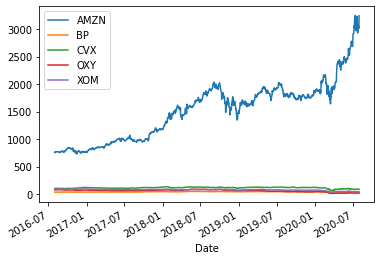

In [314]:
data['Open'].plot()
stockprices  = data['Open']

In [333]:
# Bollinger Values
stockprices  = deepcopy(data['Open'])
win = 30
df_MA = stockprices*0
df_BB_UP = stockprices*0
df_BB_LO = stockprices*0
df_BB = stockprices*0
for col in stockprices.keys().tolist():
  df_MA[col] = stockprices[col].rolling(win).mean()
  df_BB_UP[col] = stockprices[col].rolling(win).mean()+ 2*stockprices[col].rolling(win).std()
  df_BB_LO[col] = stockprices[col].rolling(win).mean()- 2*stockprices[col].rolling(win).std()
  df_BB[col] = (stockprices[col] - stockprices[col].rolling(win).mean())/( 2*stockprices[col].rolling(win).std())

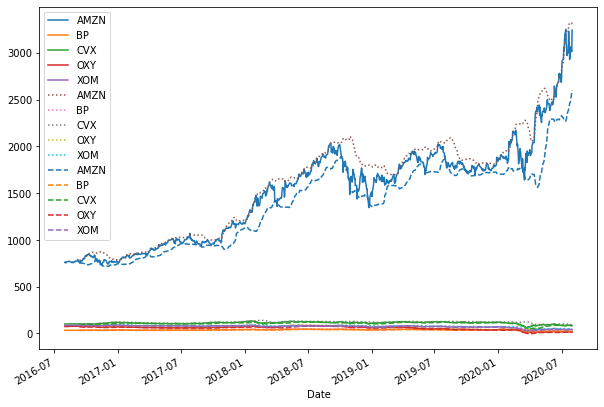

In [334]:
fig, ax   = plt.subplots(1,1,figsize=(10,7))
stockprices.plot(ax=ax)
df_BB_UP.plot(ax=ax,linestyle=':')
df_BB_LO.plot(ax=ax,linestyle='--')
plt.show()

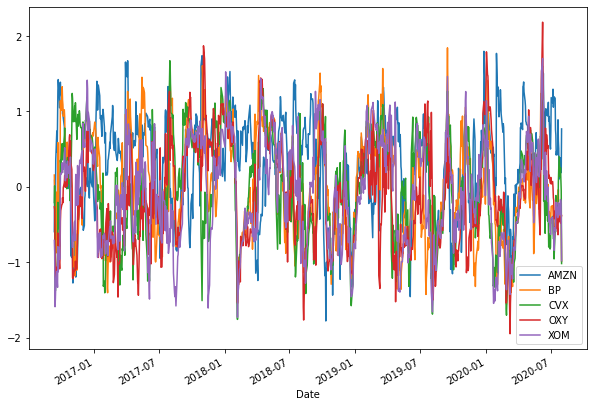

In [335]:
fig, ax   = plt.subplots(1,1,figsize=(10,7))
df_BB.plot(ax=ax)
plt.show()

In [336]:
## Relative Strength Indicator
stockprices_close = deepcopy(data['Close'])
diff = stockprices_close - stockprices
diff_index = data_index['Close'] - data_index['Open']

In [337]:
avg_gain = deepcopy(diff)
avg_gain[avg_gain<0]=0
avg_gain = avg_gain.rolling(win).mean()
avg_loss = deepcopy(diff)
avg_loss[avg_loss>0]=0
avg_loss = abs(avg_loss.rolling(win).mean())
avg_gain_index = diff_index.apply(lambda x:np.max([0,x])).rolling(win).mean()
avg_loss_index = abs(diff_index.apply(lambda x:np.min([0,x])).rolling(win).mean())

In [338]:
rsi = 100 - (100/(1+(avg_gain/avg_loss)))
rsi_index = 100 - (100/(1+(avg_gain_index/avg_loss_index)))

In [339]:
avg_gain

,AMZN,BP,CVX,OXY,XOM
Date,,,,,
2016-08-01,NaN,NaN,NaN,NaN,NaN
2016-08-02,NaN,NaN,NaN,NaN,NaN
2016-08-03,NaN,NaN,NaN,NaN,NaN
2016-08-04,NaN,NaN,NaN,NaN,NaN
2016-08-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-27,29.669653,0.157000,0.771000,0.226667,0.398667
2020-07-28,28.133659,0.127333,0.699667,0.169667,0.339000
2020-07-29,28.218327,0.136000,0.719333,0.186333,0.349667


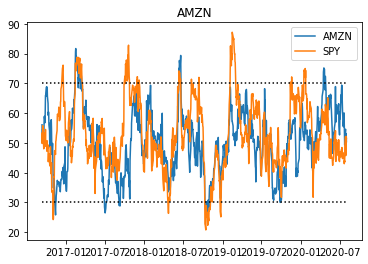

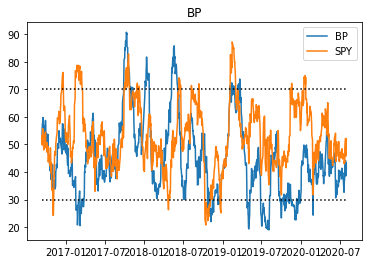

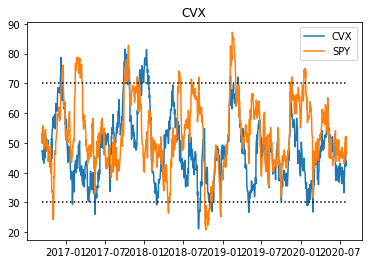

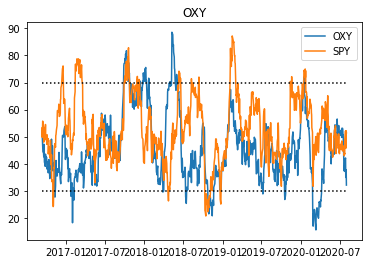

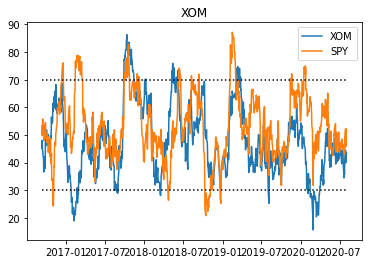

In [340]:
for ticket in rsi.keys():
  plt.plot(rsi[ticket],label = ticket)
  plt.plot(rsi_index, label = 'SPY')
  plt.plot(rsi_index*0+30,c='k',linestyle=':')
  plt.plot(rsi_index*0+70,c='k',linestyle=':')
  plt.title(ticket)
  plt.legend()
  plt.show()

In [341]:
#Volatility
win_vol = 20
volatility  = (stockprices - stockprices.rolling(win_vol).mean())/stockprices.rolling(win_vol).std()
volatility_index = (data_index['Open']- data_index['Open'].rolling(win_vol).mean())/data_index['Open'].rolling(win_vol).std()

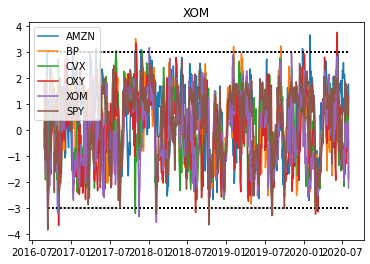

In [342]:
for ticket in volatility.keys():
  plt.plot(volatility[ticket],label = ticket)
  
  plt.plot(rsi_index*0+3,c='k',linestyle=':')
  plt.plot(rsi_index*0-3,c='k',linestyle=':')
  plt.title(ticket)
plt.plot(volatility_index, label = 'SPY')
plt.legend(loc='upper left')
plt.show()

In [343]:
# Moving average convergence divergence

ewm_26 = stockprices.ewm(span=26).mean()
ewm_12 = stockprices.ewm(span=12).mean()
ewm_9 = stockprices.ewm(span=9).mean()

In [344]:
macd_fast = ewm_12 - ewm_26
macd_slow = ewm_9
macd_indicator = macd_fast - macd_slow

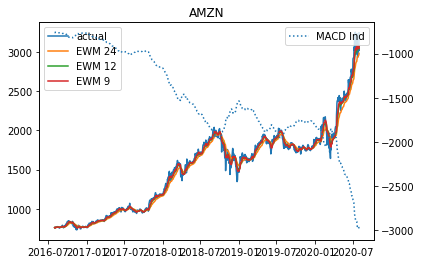

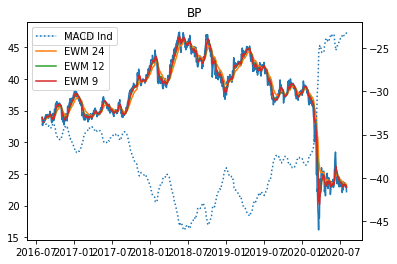

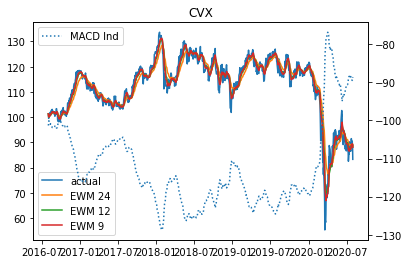

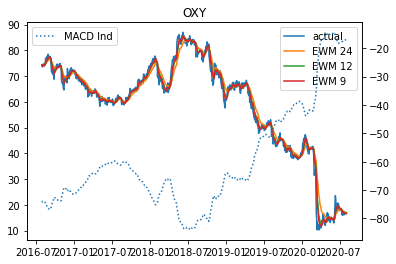

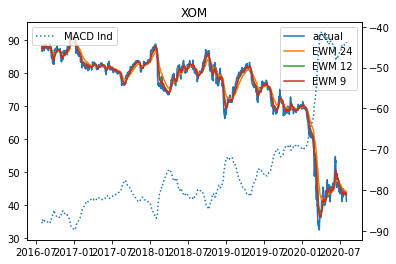

In [345]:
for key in stockprices.keys():
  fig, ax = plt.subplots(1,1)
  ax1  =ax.twinx()
  ax.plot(stockprices[key],label= 'actual')
  ax.plot(ewm_26[key],label='EWM 24')
  ax.plot(ewm_12[key],label='EWM 12')
  ax.plot(ewm_9[key],label='EWM 9')
  # ax1.plot(macd_fast[key],label='MACD Fast',linestyle=':')
  # ax1.plot(macd_slow[key],label='MACD Slow',linestyle=':')
  ax1.plot(macd_indicator[key],label='MACD Ind',linestyle=':')
  ax.set_title(key)
  ax.legend()
  ax1.legend()
  plt.show()


In [346]:
#Buy/ Hold/ Sell Strategizing
strat_BB = deepcopy(df_BB)*0
for key in strat_BB.keys():
  strat_BB.loc[df_BB[key]<0,key] = 1 #Buy
  strat_BB.loc[df_BB[key]>1,key] = -1 #Sell


In [347]:
strat_RSI = deepcopy(rsi)*0
for key in strat_RSI.keys():
  strat_RSI.loc[(rsi[key]<30) & (rsi_index>30),key] = +1 #Buy
  strat_RSI.loc[(rsi[key]>70) & (rsi_index<70),key] = -1 #Sell


In [348]:
strat_Volatility = deepcopy(rsi)*0 #Hold
strat_Volatility[(volatility>-1.5)] = +1 #Buy


In [349]:
strat_MACD = deepcopy(macd_indicator)*0 #Hold
for key in strat_MACD.keys():
  strat_MACD.loc[(macd_indicator[key]>0),key] = +1 #Buy
  strat_MACD.loc[(macd_indicator[key]<-1),key] = -1 #Sell

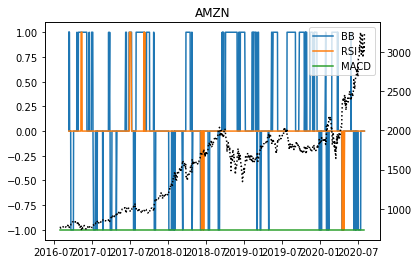

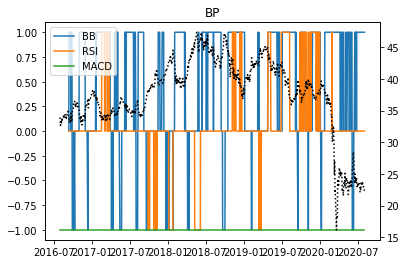

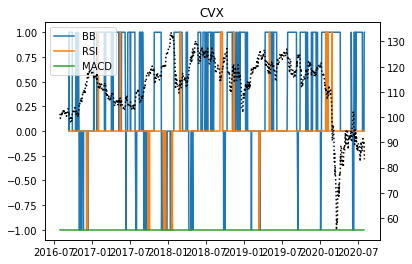

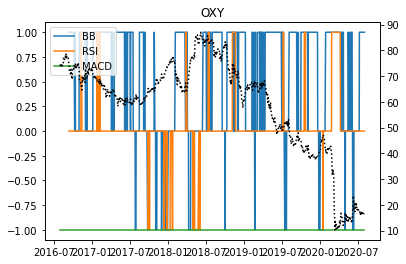

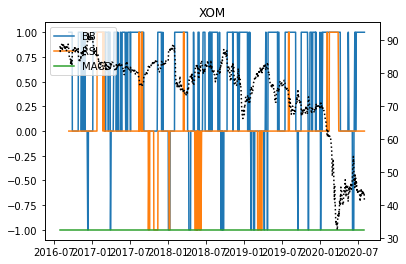

In [368]:
for key in stockprices.keys():
  fig, ax = plt.subplots(1,1)
  ax1  =ax.twinx()
  ax.plot(strat_BB[key],label= 'BB')
  ax.plot(strat_RSI[key],label='RSI')
  #ax.plot(strat_Volatility[key],label='Volat')
  ax.plot(strat_MACD[key],label='MACD')
  ax1.plot(stockprices[key],c = 'k', linestyle = ':')
  ax.set_title(key)
  ax.legend()
  #ax1.legend()
  plt.show()

In [376]:
strat   = (strat_BB + strat_RSI)
strat0 = strat*0
for key in strat.keys():
  strat0[key].loc[strat[key]>=2] = 1 #Buy
  strat0[key].loc[strat[key]<=-2] = -1 #Sell

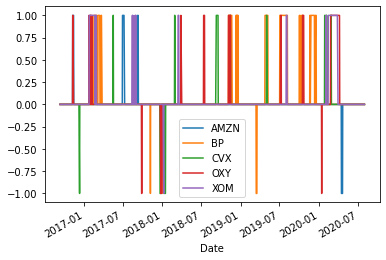

In [378]:
strat0.plot()

In [379]:
#Comparison of optimized strategies vs Benchmark( Buy 10 shares of each stock at t=0 and hold)

price_diff = stockprices_close-stockprices

In [400]:
stocks_held = (strat0*0)
stocks_held.iloc[0:win,:] = 10
net_worth = (stocks_held*stockprices_close).sum(axis=1)
net_worth_bm = (stocks_held*stockprices_close).sum(axis=1)
for i in range(win+1,len(stocks_held)):
  stocks_held.iloc[i,:] = stocks_held.iloc[i-1,:]+(strat0.iloc[i,:]*5)
  net_worth.iloc[i,:] = (stocks_held.iloc[i,:]*stockprices_close.iloc[i,:]).sum()
  net_worth_bm.iloc[i,:] = (10*stockprices_close.iloc[i,:]).sum()

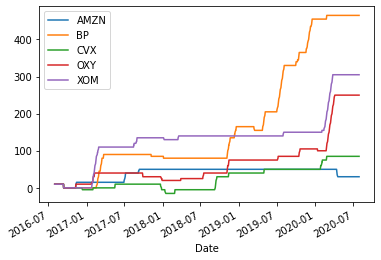

In [397]:
stocks_held.plot()

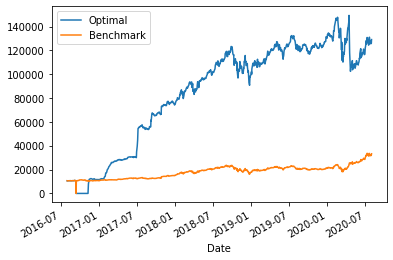

In [404]:
net_worth.plot(label='Optimal')
net_worth_bm.plot(label = 'Benchmark')
plt.legend()
plt.show()